### ¿Cómo se relacionan los distintos tramos de Fonasa con la frecuencia y el tipo de prestaciones recibidas?


In [ ]:
import pandas as pd
import os

beneficiarios_df = pd.read_csv(os.path.join("data","beneficiarios_2023.csv"), encoding='latin1', nrows=10**5)
mle_2023_df = pd.read_csv(os.path.join("data","mle_2023.csv"), encoding='latin1', nrows=10**5)

In [ ]:
#Cambio de miss typo de la base de datos nacional
mle_2023_df = mle_2023_df.rename(columns={'PRESTRACIONES': 'PRESTACIONES'})


### Queremos estudiar los distintos tramos para poder adquirir contexto de los distintos tramos y sus comportamientos respectos a los distintos tipo de producto de Fonasa que la poblacion estuvo haciendo.

### Primero vamos a analizar el contexto de los datos en los que nos encontramos respecto a cierta porcion de la totalidad de la base de datos y luego vamos a poder realizar un estudio normalizado de todos los datos.

In [18]:
# Calcular la frecuencia total de prestaciones por tramo Fonasa
cant_por_tramo = mle_2023_df.groupby("TRAMO_FONASA")["PRESTACIONES"].sum().reset_index()

cant_por_tramo.columns = ["Tramo Fonasa", "Total Prestaciones"]

print(cant_por_tramo)


  Tramo Fonasa  Total Prestaciones
0            A                28.0
1            B             55262.0
2            C             20508.0
3            D             45021.0
4            X               588.0


In [19]:
# Agrupar por tramo y tipo de prestación (sección)
tipo_por_tramo = mle_2023_df.groupby(["TRAMO_FONASA", "DESC_SECCION"])["PRESTACIONES"].sum().reset_index()

# Sorteamos
tipo_por_tramo = tipo_por_tramo.sort_values(["TRAMO_FONASA", "PRESTACIONES"], ascending=[True, False])

tipo_por_tramo.head()


,TRAMO_FONASA,DESC_SECCION,PRESTACIONES
0,A,Atención Médica,16.0
1,A,Exámenes De Diagnóstico,10.0
2,A,Intervenciones Quirúrgicas,1.0
3,A,Proc. Apoyo Clínico Y Terap.,1.0
7,B,Exámenes De Diagnóstico,25904.0


### De aqui podremos ver ordenada segun la edad y el tramo para adquirir tambien cierta nocion de la forma en que esos datos estan distribuidos en la poblacion segun distintas variables

In [20]:
# Agrupar por tramo Fonasa y edad
distribucion_edad = beneficiarios_df.groupby(["TRAMO_FONASA", "EDAD_TRAMO"]).size().reset_index(name="Count")

distribucion_edad.head()


,TRAMO_FONASA,EDAD_TRAMO,Count
0,A,0 a 9 años,3520
1,A,10 a 19 años,5034
2,A,20 a 29 años,1826
3,A,30 a 39 años,1940
4,A,40 a 49 años,1778


### Equivalentemente lo mismo para los generos

In [21]:
# Agrupar por tramo Fonasa y sexo
distribucion_genero = beneficiarios_df.groupby(["TRAMO_FONASA", "SEXO"]).size().reset_index(name="Count")

print(distribucion_genero)


  TRAMO_FONASA             SEXO  Count
0            A           Hombre   7475
1            A            Mujer  10127
2            A  Sin información      1
3            B           Hombre  17841
4            B            Mujer  23804
5            B  Sin información      1
6            C           Hombre   8605
7            C            Mujer   7933
8            D           Hombre  13787
9            D            Mujer  10426


### Ahora vamos a graficar segun el sample que sacamos de la base de datos de MLE para poder adquirir cierta nocion del por un lado el tramo y luego la frecuencia de esta respecto al sample que obtuvimos.

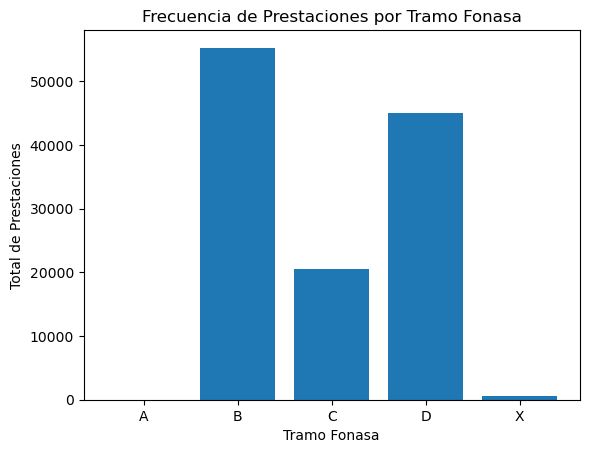

In [22]:
import matplotlib.pyplot as plt

plt.bar(cant_por_tramo["Tramo Fonasa"], cant_por_tramo["Total Prestaciones"])
plt.title("Frecuencia de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Total de Prestaciones")
plt.show()


### Luego aca podemos analizar la distribucion de tipos de prestacion por tramo y poder analizar la porcion que cada distribucion adquiere en nuestro sample.

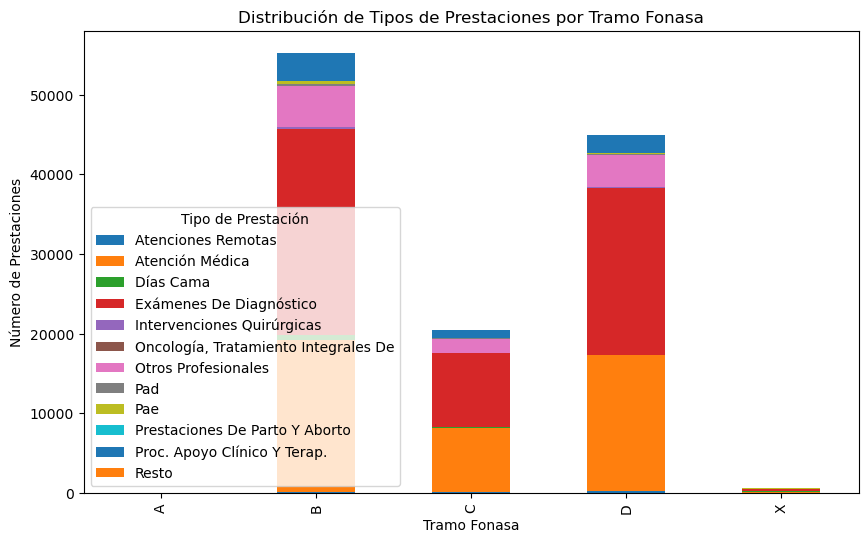

In [23]:
# Gráfico apilado para tipos de prestaciones por tramo
type_pivot = tipo_por_tramo.pivot(index="TRAMO_FONASA", columns="DESC_SECCION", values="PRESTACIONES")
type_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Distribución de Tipos de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Número de Prestaciones")
plt.legend(title="Tipo de Prestación")
plt.show()


### Finalmente aplicamos cierta normalizacion segun la norma para poder adquirir una nocion que trasciende las distribuciones relativas segun el tipo de sample que uno quiera adquirir

Ahora analizando las relaciones y porcentajes entre las variables tenemos:

In [24]:
# Calcular la frecuencia total de prestaciones por tramo Fonasa
cant_por_tramo = mle_2023_df.groupby("TRAMO_FONASA")["PRESTACIONES"].sum().reset_index()
cant_por_tramo.columns = ["Tramo Fonasa", "Total Prestaciones"]

tipo_por_tramo = mle_2023_df.groupby(["TRAMO_FONASA", "DESC_SECCION"])["PRESTACIONES"].sum().reset_index()

tipo_por_tramo = tipo_por_tramo.sort_values(["TRAMO_FONASA", "PRESTACIONES"], ascending=[True, False])


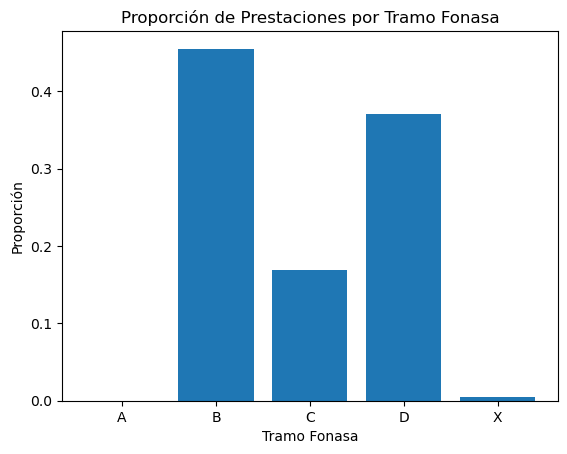

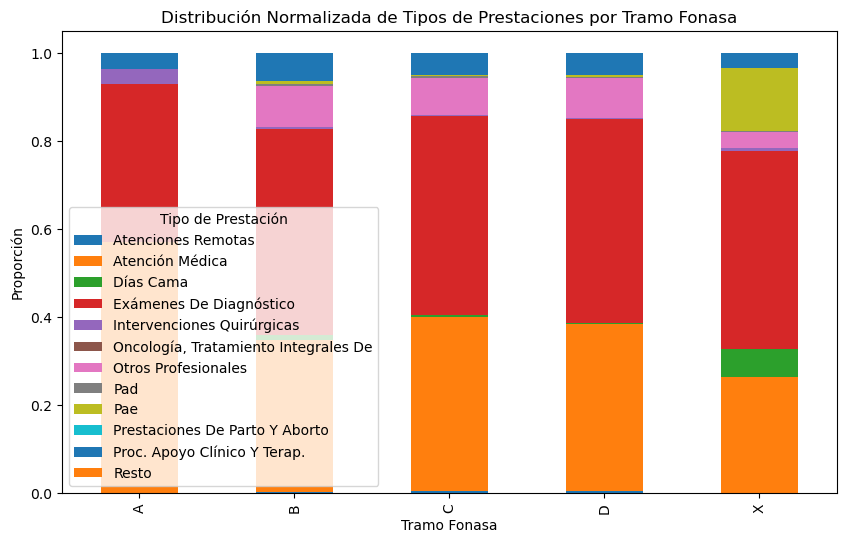

In [25]:
# Normalizar frecuencia total de prestaciones por tramo
cant_por_tramo["Proporción"] = cant_por_tramo["Total Prestaciones"] / cant_por_tramo["Total Prestaciones"].sum()

# Normalizar tipos de prestaciones por tramo
tipo_por_tramo["Proporción"] = tipo_por_tramo.groupby("TRAMO_FONASA")["PRESTACIONES"].transform(lambda x: x / x.sum())

plt.bar(cant_por_tramo["Tramo Fonasa"], cant_por_tramo["Proporción"])
plt.title("Proporción de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Proporción")
plt.show()

type_pivot_normalized = tipo_por_tramo.pivot(index="TRAMO_FONASA", columns="DESC_SECCION", values="Proporción")
type_pivot_normalized.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Distribución Normalizada de Tipos de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Proporción")
plt.legend(title="Tipo de Prestación")
plt.show()  


### Podemos luego terminar analizando y concluyendo los tramos y las distintas distribuciones que son mas consumidas por los clientes de Fonasa, por un lado los Examenes de Diagnostico en la totalidad de los distintos tramos y de la misma forma las atenciones medicas las cuales hacen sentido ya que se podria decir que es lo que la gente mas hace sin necesidad de buscar cierta atencion especial